In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns 
from urllib.request import urlretrieve

In [303]:
data1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220305.txt")
data2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220312.txt")
data3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220319.txt")
data4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220326.txt")
data5 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220402.txt")
data6 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220409.txt")
data7 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220416.txt")
data8 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220423.txt")
data9 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220430.txt")
data10 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220507.txt")
data11 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220514.txt")
data12 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220521.txt")
data13 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220528.txt")


In [304]:
mta = pd.concat([data1,data2 ,data3, data4,data5, data6,data7, data8, data9, data10, data11, data12, data13 ])

In [305]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739787 entries, 0 to 211706
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [306]:
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530
...,...,...,...,...,...,...,...,...,...,...,...
211702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,05:00:00,REGULAR,0,382
211703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,09:00:00,REGULAR,0,382
211704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,13:00:00,REGULAR,0,383
211705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,17:00:00,REGULAR,0,386


In [307]:
# EXIT okunmuyor kontrol ettik ve beklenenden uzun bir texti var
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [308]:
# Sütun adlarındaki boşlukları kaldırdık

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [309]:
#Yinelenen satırlar kontrol ettikten sonra silip kalıcı hale getirdik

mta.drop_duplicates(subset=None, keep="first", inplace=True)


In [310]:
# 'C/A', 'UNIT', 'SCP'yi birleştiren "TURNSTILE" sütununu verimize ekledik
mta["TURNSTILE"] = mta["C/A"]+"-"+mta["UNIT"]+"-"+mta["SCP"]


In [311]:
# "DATE" ve "TIME" öğelerini birleştiren DATETIME sütunu olarak DATETIME kolonunu oluşturduk
mta['DATETIME'] = mta["DATE"]+ " " + mta["TIME"]

mta['DATETIME'] = pd.to_datetime(mta['DATETIME'], format='%m/%d/%Y %H:%M:%S')

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739787 entries, 0 to 211706
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
 12  DATETIME   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 292.6+ MB


In [312]:
#"NAMEOFDAY" adlı bir sütun oluşturduk
mta["NAMEOFDAY"]= mta["DATETIME"].dt.day_name()
mta.NAMEOFDAY.value_counts()

Monday       392823
Tuesday      392569
Wednesday    392522
Thursday     391486
Saturday     391241
Friday       390714
Sunday       388432
Name: NAMEOFDAY, dtype: int64

In [313]:
# ay bilgisini getirdik
mta["MONTH"] = mta["DATETIME"].dt.month

In [314]:
# haftasonu sütunu oluşturuldu 
mta['WEEKEND'] = (mta.NAMEOFDAY == "Sunday") |  (mta.NAMEOFDAY == "Saturday")
mta.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,NAMEOFDAY,MONTH,WEEKEND
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26 03:00:00,Saturday,2,True
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26 07:00:00,Saturday,2,True
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26 11:00:00,Saturday,2,True
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26 15:00:00,Saturday,2,True
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26 19:00:00,Saturday,2,True


In [315]:
# Bize gerekli olan sütunlarla çalışmak için aşağıdaki kolonları aldık.

mta = mta[["STATION","TURNSTILE","DATE","TIME","DATETIME","NAMEOFDAY","ENTRIES","EXITS"]]



In [316]:
#Benzersiz istasyon sayısı
len(mta["STATION"].unique())


379

In [317]:
#benzersiz turnike sayısı
len(mta["TURNSTILE"].unique())


5049

In [318]:
# İstasyonlara göre ilk 10 satır
print(mta["STATION"].value_counts().sort_values(ascending=False).head(10))

34 ST-PENN STA     55565
FULTON ST          52487
GRD CNTRL-42 ST    51879
23 ST              40085
86 ST              35373
CANAL ST           31743
59 ST              30668
TIMES SQ-42 ST     30169
CHAMBERS ST        30040
34 ST-HERALD SQ    29308
Name: STATION, dtype: int64


In [319]:
# Turnike ve datetime değişkenlerine göre sıraladık
mta = mta.sort_values(by=['TURNSTILE', 'DATETIME']).reset_index()
mta.head(5)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
0,0,59 ST,A002-R051-02-00-00,02/26/2022,03:00:00,2022-02-26 03:00:00,Saturday,7689737,2671257
1,1,59 ST,A002-R051-02-00-00,02/26/2022,07:00:00,2022-02-26 07:00:00,Saturday,7689741,2671278
2,2,59 ST,A002-R051-02-00-00,02/26/2022,11:00:00,2022-02-26 11:00:00,Saturday,7689758,2671380
3,3,59 ST,A002-R051-02-00-00,02/26/2022,15:00:00,2022-02-26 15:00:00,Saturday,7689791,2671465
4,4,59 ST,A002-R051-02-00-00,02/26/2022,19:00:00,2022-02-26 19:00:00,Saturday,7689858,2671530


In [320]:
# turnike giriş çıkış değerlerinin farklarını alarak dataframe e ekledik
mta['DIF_ENTRIES'] = mta.groupby(['TURNSTILE'])['ENTRIES'].diff()
mta['DIF_EXITS'] = mta.groupby(['TURNSTILE'])['EXITS'].diff()
mta.head()

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS
0,0,59 ST,A002-R051-02-00-00,02/26/2022,03:00:00,2022-02-26 03:00:00,Saturday,7689737,2671257,NaN,NaN
1,1,59 ST,A002-R051-02-00-00,02/26/2022,07:00:00,2022-02-26 07:00:00,Saturday,7689741,2671278,4.0,21.0
2,2,59 ST,A002-R051-02-00-00,02/26/2022,11:00:00,2022-02-26 11:00:00,Saturday,7689758,2671380,17.0,102.0
3,3,59 ST,A002-R051-02-00-00,02/26/2022,15:00:00,2022-02-26 15:00:00,Saturday,7689791,2671465,33.0,85.0
4,4,59 ST,A002-R051-02-00-00,02/26/2022,19:00:00,2022-02-26 19:00:00,Saturday,7689858,2671530,67.0,65.0


In [321]:
#Yeni değerler ayarlamadan önce girişler ve çıkışlar için Fark değerlerini kontrol etme

print(mta["DIF_ENTRIES"].describe())
print("-------------------------------------")
print(mta["DIF_EXITS"].describe())

count        2,734,738.0
mean             1,411.0
std          1,591,048.7
min     -1,278,711,184.0
25%                  4.0
50%                 28.0
75%                 95.0
max      1,278,711,326.0
Name: DIF_ENTRIES, dtype: float64
-------------------------------------
count        2,734,738.0
mean             1,572.5
std          1,665,947.0
min     -1,056,964,540.0
25%                  6.0
50%                 37.0
75%                114.0
max      1,871,701,193.0
Name: DIF_EXITS, dtype: float64


In [322]:
print("Negatif değerlerden DIF_ENTRIES için kaç tane var?")
print(len(mta[mta["DIF_ENTRIES"]<0]))
print("Negatif değerlerden DIF_EXITS için kaç tane var?")
print(len(mta[mta["DIF_EXITS"]<0]))

Negatif değerlerden DIF_ENTRIES için kaç tane var?
27412
Negatif değerlerden DIF_EXITS için kaç tane var?
16386


In [323]:
#Negatif ve nicelikten daha yüksek (0,95) için yeni değerler (medyan) ayarlama

mta["DIF_ENTRIES"] = mta["DIF_ENTRIES"].fillna(0)
mta["DIF_EXITS"] = mta["DIF_EXITS"].fillna(0)
mta['DIF_ENTRIES'][mta['DIF_ENTRIES'] < 0] = (mta["DIF_ENTRIES"].median())
mta['DIF_EXITS'][mta['DIF_EXITS'] < 0] = (mta["DIF_EXITS"].median())
mta['DIF_ENTRIES'][mta['DIF_ENTRIES'] > (mta["DIF_ENTRIES"].quantile(0.95))] = (mta["DIF_ENTRIES"].median()) 
mta['DIF_EXITS'][mta['DIF_EXITS'] > (mta["DIF_EXITS"].quantile(0.95))] = (mta["DIF_EXITS"].median()) 

/var/folders/cm/rm_qjzf97ql82ws9blzthl580000gn/T/ipykernel_43820/1694018013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta['DIF_ENTRIES'][mta['DIF_ENTRIES'] < 0] = (mta["DIF_ENTRIES"].median())
/var/folders/cm/rm_qjzf97ql82ws9blzthl580000gn/T/ipykernel_43820/1694018013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta['DIF_EXITS'][mta['DIF_EXITS'] < 0] = (mta["DIF_EXITS"].median())
/var/folders/cm/rm_qjzf97ql82ws9blzthl580000gn/T/ipykernel_43820/1694018013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [324]:
pd.options.display.float_format = '{:,.1f}'.format

In [325]:
#Yeni değerler ayarlandıktan sonra girişler ve çıkışlar için fark değerlerinin kontrol edilmesi
print("Descriptive Statistics for DIF_ENTRIES column:")
print(mta["DIF_ENTRIES"].describe())
print("Descriptive Statistics for DIF_EXITS column:")
print(mta["DIF_EXITS"].describe())

Descriptive Statistics for DIF_ENTRIES column:
count   2,739,787.0
mean           51.4
std            63.2
min             0.0
25%             4.0
50%            28.0
75%            76.0
max           276.0
Name: DIF_ENTRIES, dtype: float64
Descriptive Statistics for DIF_EXITS column:
count   2,739,787.0
mean           64.3
std            78.9
min             0.0
25%             7.0
50%            37.0
75%            91.0
max           362.0
Name: DIF_EXITS, dtype: float64


In [326]:
#TRAFFIC sütunu DIF_ENTRIES + DIF_EXITS hesaplanması
mta["TRAFFIC"] = mta["DIF_ENTRIES"] + mta["DIF_EXITS"]
mta.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,0,59 ST,A002-R051-02-00-00,02/26/2022,03:00:00,2022-02-26 03:00:00,Saturday,7689737,2671257,0.0,0.0,0.0
1,1,59 ST,A002-R051-02-00-00,02/26/2022,07:00:00,2022-02-26 07:00:00,Saturday,7689741,2671278,4.0,21.0,25.0
2,2,59 ST,A002-R051-02-00-00,02/26/2022,11:00:00,2022-02-26 11:00:00,Saturday,7689758,2671380,17.0,102.0,119.0
3,3,59 ST,A002-R051-02-00-00,02/26/2022,15:00:00,2022-02-26 15:00:00,Saturday,7689791,2671465,33.0,85.0,118.0
4,4,59 ST,A002-R051-02-00-00,02/26/2022,19:00:00,2022-02-26 19:00:00,Saturday,7689858,2671530,67.0,65.0,132.0
5,5,59 ST,A002-R051-02-00-00,02/26/2022,23:00:00,2022-02-26 23:00:00,Saturday,7689890,2671568,32.0,38.0,70.0
6,6,59 ST,A002-R051-02-00-00,02/27/2022,03:00:00,2022-02-27 03:00:00,Sunday,7689903,2671580,13.0,12.0,25.0
7,7,59 ST,A002-R051-02-00-00,02/27/2022,07:00:00,2022-02-27 07:00:00,Sunday,7689908,2671583,5.0,3.0,8.0
8,8,59 ST,A002-R051-02-00-00,02/27/2022,11:00:00,2022-02-27 11:00:00,Sunday,7689924,2671637,16.0,54.0,70.0
9,9,59 ST,A002-R051-02-00-00,02/27/2022,15:00:00,2022-02-27 15:00:00,Sunday,7689970,2671692,46.0,55.0,101.0


In [327]:
mta.groupby("DATE").sum().sort_values("TRAFFIC",ascending=False).head(7)

,index,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
DATE,,,,,,
05/18/2022,3162085721,1300845608452,1049501866157,"1,776,219.0","2,197,858.0","3,974,077.0"
05/19/2022,3182853086,1305009582365,1054062527404,"1,771,410.0","2,181,422.0","3,952,832.0"
05/20/2022,3144503850,1295237274058,1043960124477,"1,761,285.0","2,171,697.0","3,932,982.0"
05/05/2022,3191981260,1302050303746,1050082882794,"1,769,208.0","2,152,793.0","3,922,001.0"
05/06/2022,3174435375,1299971511257,1050620186611,"1,762,327.0","2,159,343.0","3,921,670.0"
05/26/2022,3178570873,1300075852638,1051023236079,"1,754,179.0","2,165,765.0","3,919,944.0"
05/12/2022,3201352972,1321388768832,1074945755936,"1,756,565.0","2,161,699.0","3,918,264.0"


In [328]:
#yeni TRAFFIC değeri
mta["TRAFFIC"].describe()


count   2,739,787.0
mean          115.8
std           118.4
min             0.0
25%            17.0
50%            77.0
75%           182.0
max           637.0
Name: TRAFFIC, dtype: float64

/Users/melizturkileri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRAFFIC'>

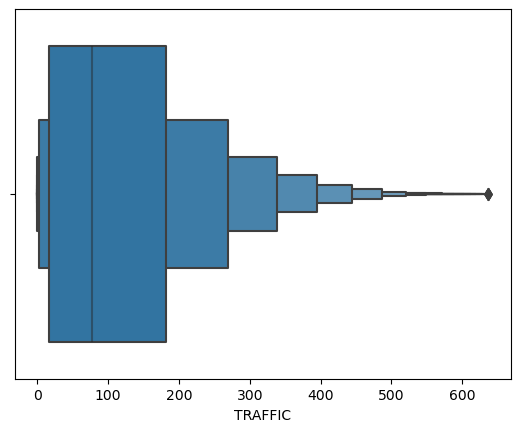

In [329]:
sns.boxenplot(mta["TRAFFIC"])

In [330]:
# Trafiğe göre en yoğun 7 istasyonu bulma

mta_top7 = mta.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(7)
mta_top7 = mta_top7.reset_index()
mta_top7.head()

,STATION,index,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,34 ST-PENN STA,5197868404,2532647163410,2840436647074,"3,396,164.0","4,479,645.0","7,875,809.0"
1,23 ST,3904035041,3148576924965,3172224961346,"2,303,272.0","3,286,182.0","5,589,454.0"
2,GRD CNTRL-42 ST,8449421769,1192765665976,1046296257912,"2,079,658.0","3,123,479.0","5,203,137.0"
3,TIMES SQ-42 ST,3667832105,3022340526920,2408179422396,"2,138,524.0","2,743,104.0","4,881,628.0"
4,86 ST,3850792731,583479026423,464230226564,"2,191,050.0","2,645,595.0","4,836,645.0"


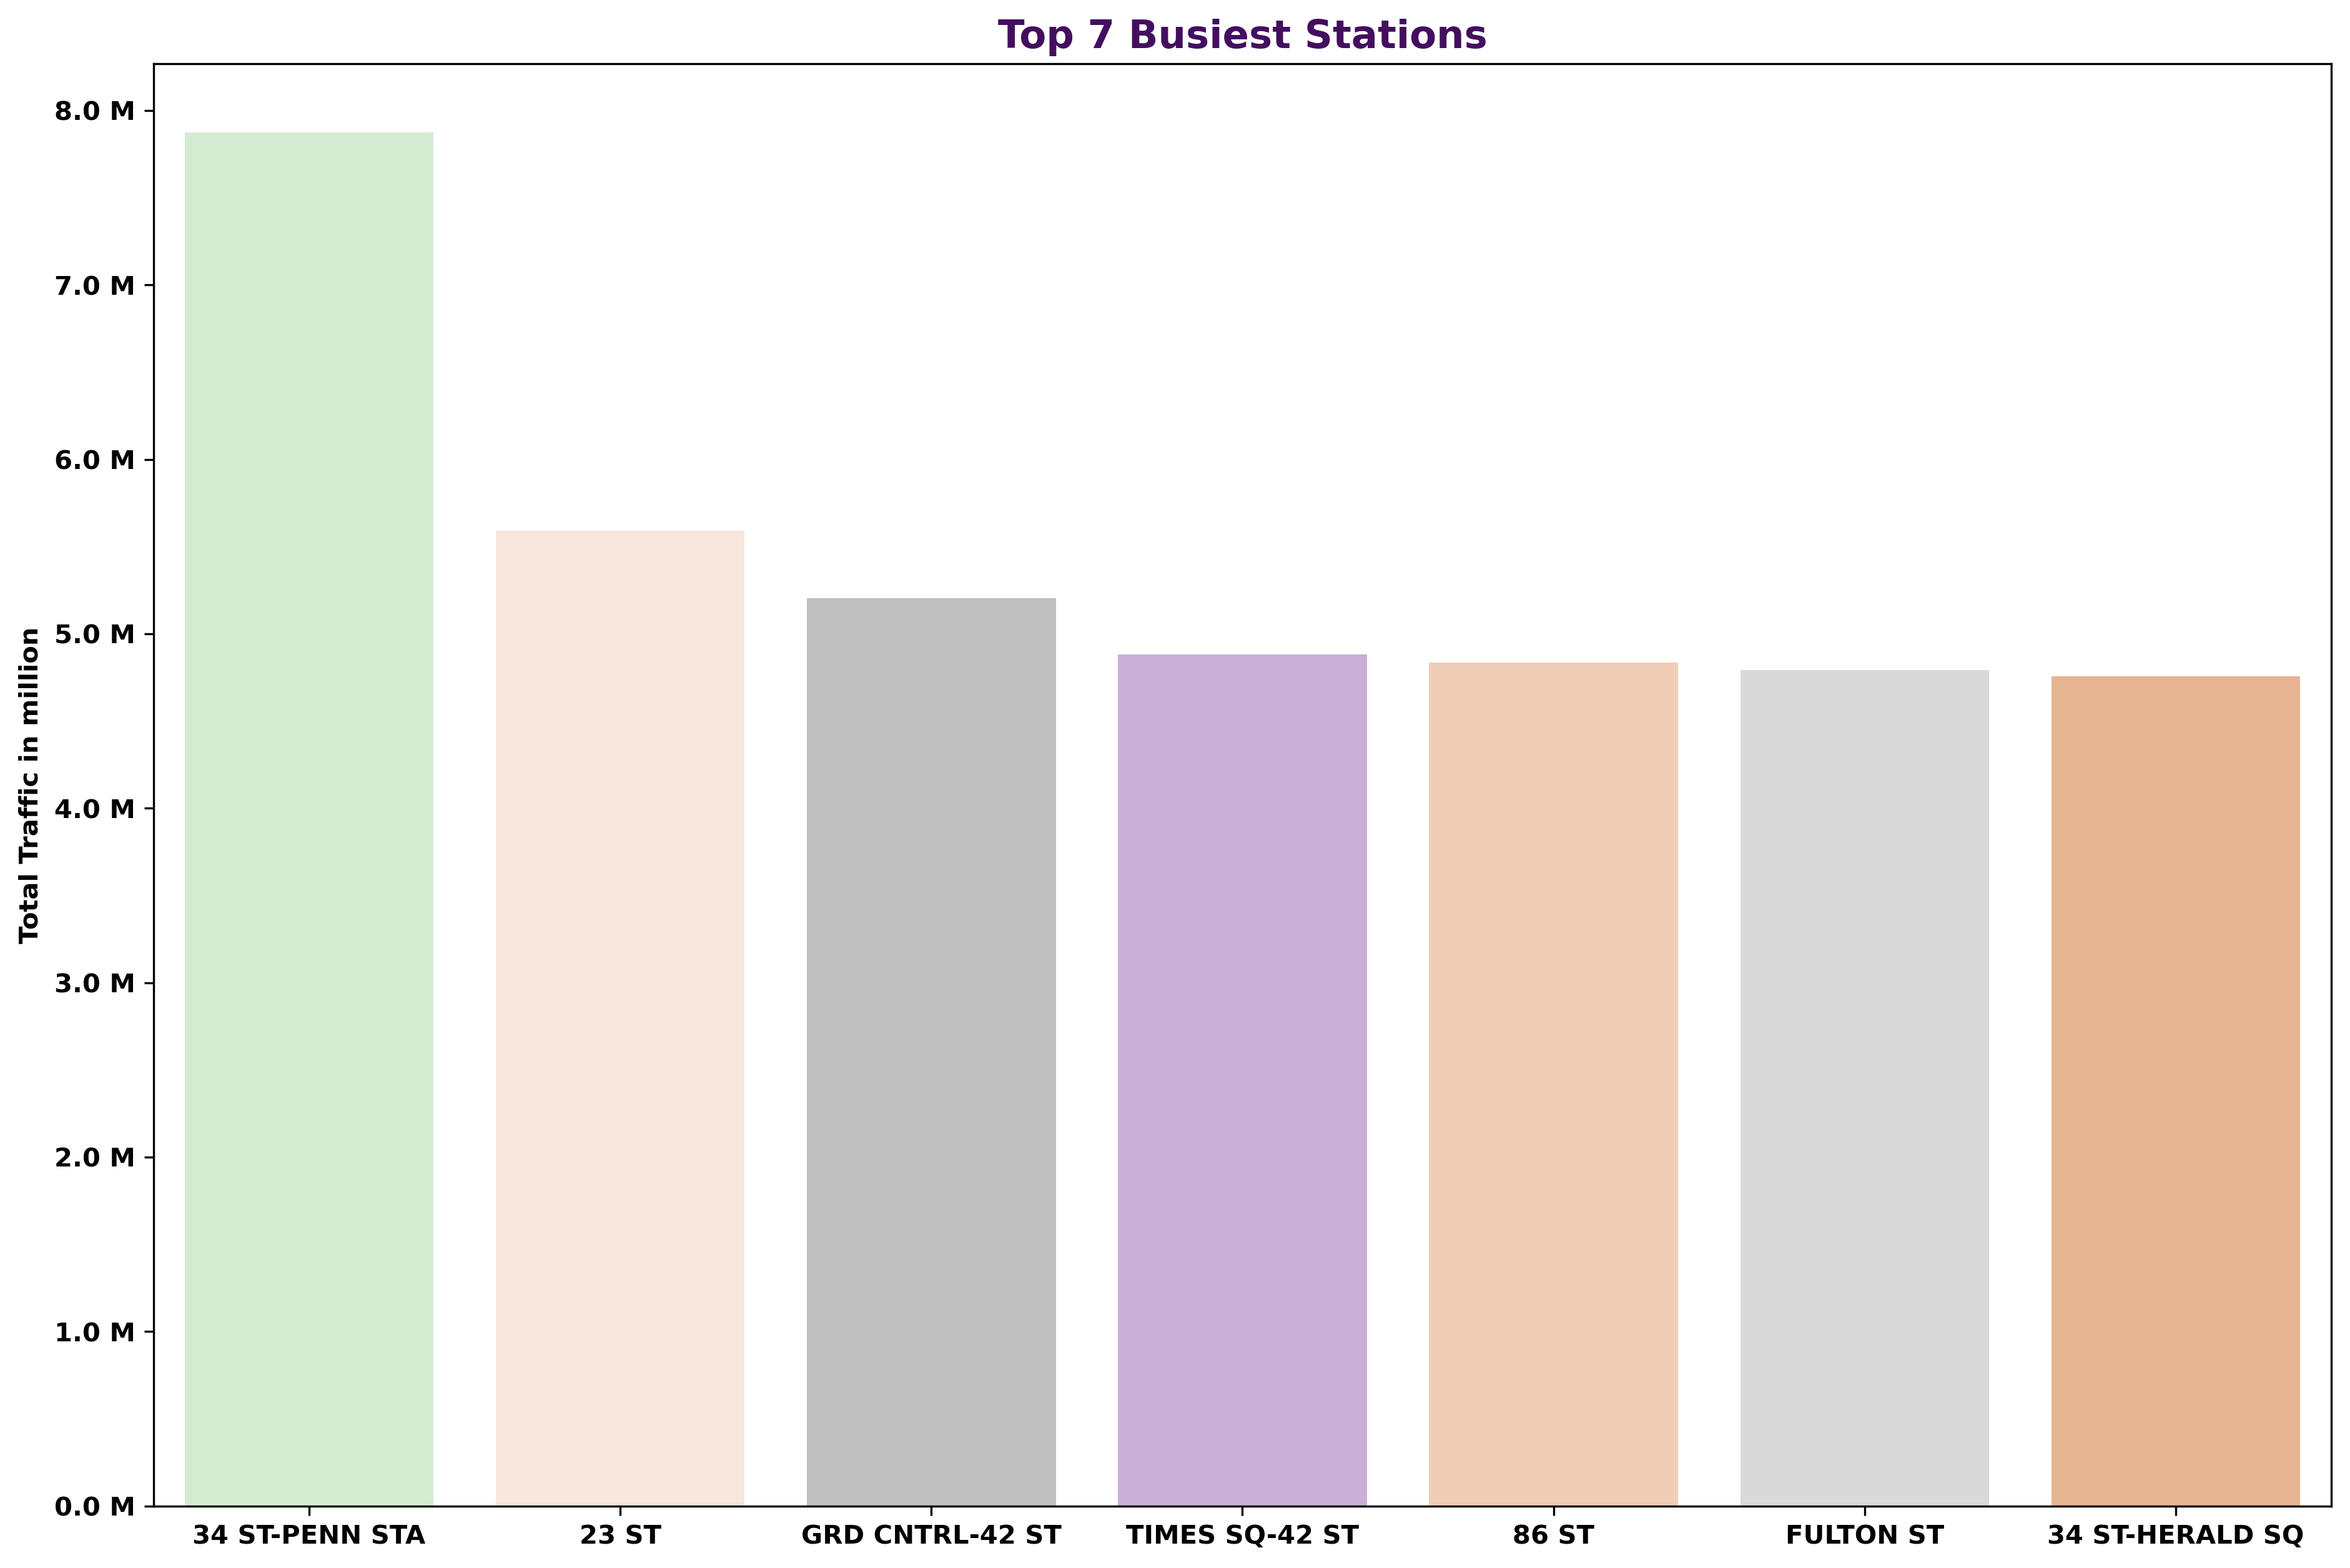

In [331]:
#En Yoğun 7 İstasyon için #Barplot

def million_formatter(x,pos):
    return"%.1f M" % (x/1E6)
plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
color=['#CFF0CC','#FBE5D6', '#BFBFBF', '#CCA9DD', '#F8CBAD','#D9D9D9', '#F4B183']
ax = sns.barplot(x="STATION", y="TRAFFIC", palette=color, data=mta_top7)
plt.title("Top 7 Busiest Stations", weight="bold", c="#440E5F", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax.yaxis.set_major_formatter(million_formatter)
ax.set_facecolor("white")
plt.ylabel("Total Traffic in million",weight= "bold",c="k")
plt.ylim(0)
plt.yticks(weight="bold")
plt.show()


In [332]:
# Trafiğe göre genel olarak en yoğun günü ortalama kullanarak bulma

mta_busiest_day_station=mta[((mta["STATION"]=="34 ST-PENN STA") 
                  | (mta["STATION"]=="FULTON ST")
                  | (mta["STATION"]=='23 ST')
                  | (mta["STATION"]=='GRD CNTRL-42 ST')
                  | (mta["STATION"]=="86 ST")
                  | (mta["STATION"]=="34 ST-HERALD SQ")
                  | (mta["STATION"]=="TIMES SQ-42 ST"))].groupby(['STATION','NAMEOFDAY', 'DATE'])['TRAFFIC'].sum(None).reset_index()

mta_busiest_day=mta_busiest_day_station.groupby(['NAMEOFDAY'])['TRAFFIC'].mean(None).reset_index()

mta_busiest_day.head(10)


,NAMEOFDAY,TRAFFIC
0,Friday,"65,379.0"
1,Monday,"61,207.5"
2,Saturday,"51,699.3"
3,Sunday,"45,064.1"
4,Thursday,"65,302.7"
5,Tuesday,"63,518.4"
6,Wednesday,"64,734.4"


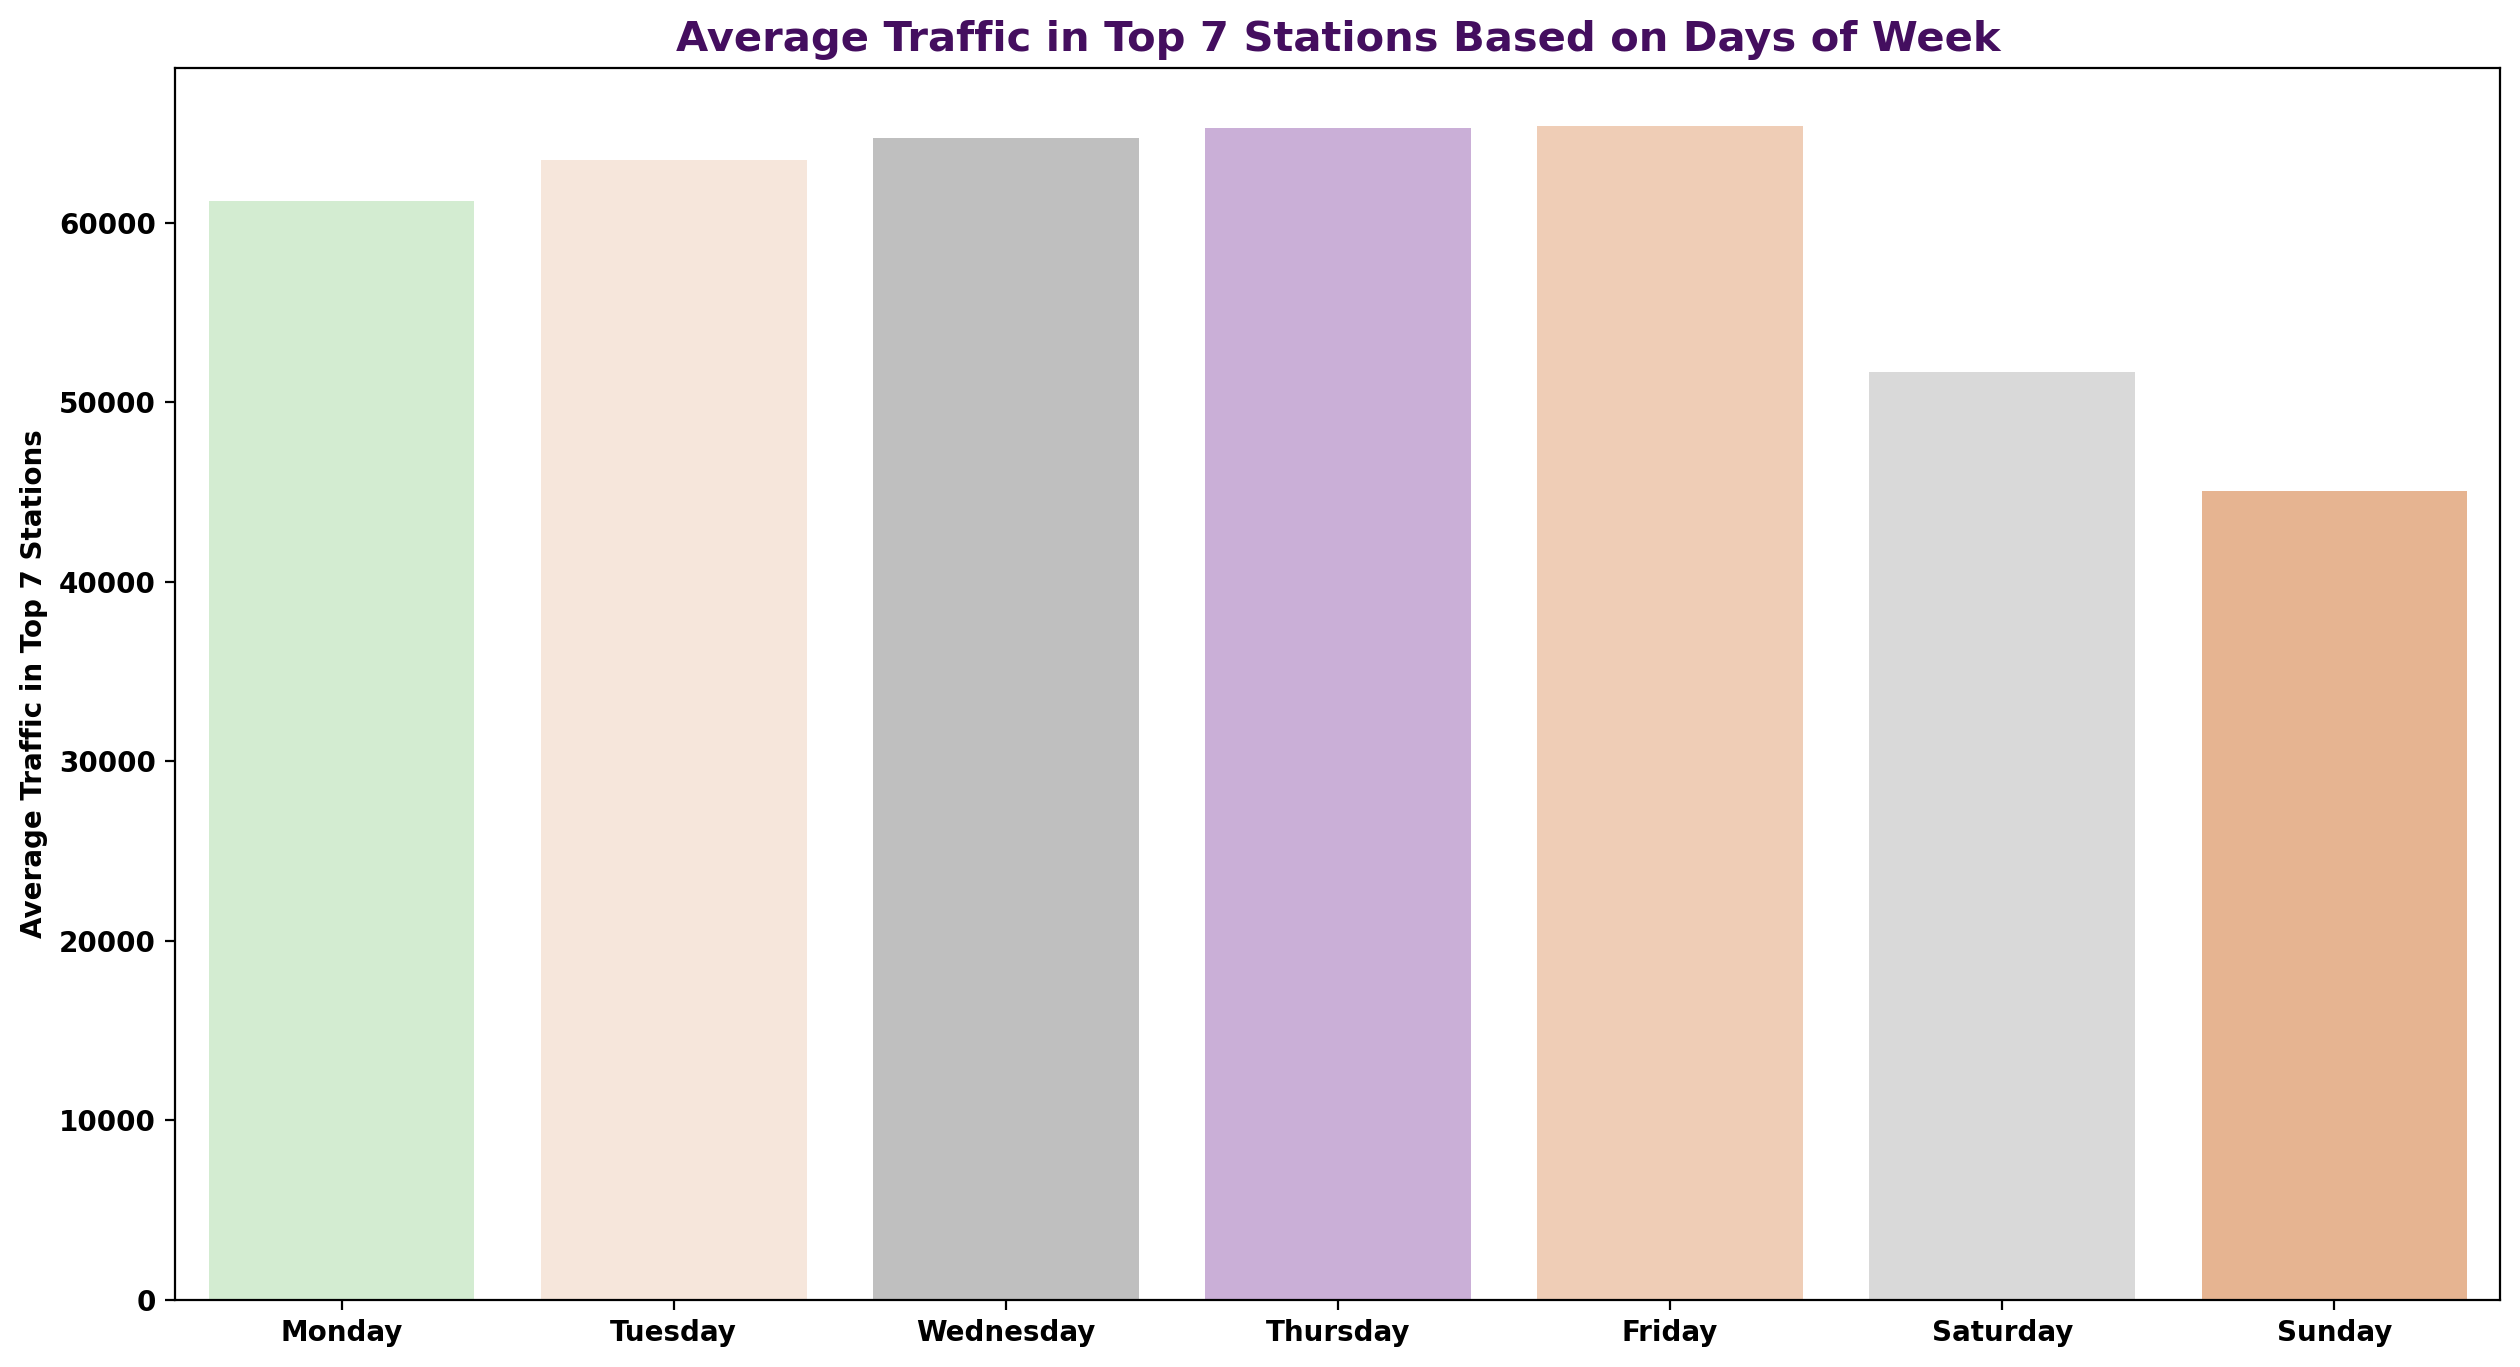

In [333]:
#Toplam trafik için #Barplot
def million_formatter(x,pos):
    return"%.1f M" % (x/1E6)

plt.figure(figsize=(15,8),dpi=200),
plt.style.use('classic')
plt.style.use('default')
color=['#CFF0CC','#FBE5D6', '#BFBFBF', '#CCA9DD', '#F8CBAD','#D9D9D9', '#F4B183']
ax = sns.barplot(x="NAMEOFDAY",y="TRAFFIC",palette=color,data=mta_busiest_day, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])
plt.title("Average Traffic in Top 7 Stations Based on Days of Week", weight="bold", c="#440E5F",fontsize=15)
plt.xlabel("")
plt.xticks(rotation=0, weight="bold")
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.ylabel("Average Traffic in Top 7 Stations",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0)
#plt.savefig('images/02_TotalTrafficPerDayBarPlot.png', dpi=200)
plt.show()


In [334]:
# Trafiğe göre genel olarak en yoğun günü ortalama kullanarak bulma


mta_busiest_station_daily=mta_busiest_day_station.groupby(['STATION','NAMEOFDAY'])['TRAFFIC'].mean(None).reset_index()

mta_busiest_station_daily.head(20)

,STATION,NAMEOFDAY,TRAFFIC
0,23 ST,Friday,"67,776.4"
1,23 ST,Monday,"63,261.5"
2,23 ST,Saturday,"52,678.3"
3,23 ST,Sunday,"42,604.1"
4,23 ST,Thursday,"69,119.5"
5,23 ST,Tuesday,"66,651.8"
6,23 ST,Wednesday,"67,866.3"
7,34 ST-HERALD SQ,Friday,"54,340.6"
8,34 ST-HERALD SQ,Monday,"51,955.6"
9,34 ST-HERALD SQ,Saturday,"50,710.8"


In [335]:
mta_top7_daily = mta_busiest_station_daily[(mta_busiest_station_daily["STATION"]=="34 ST-PENN STA") 
                  | (mta_busiest_station_daily["STATION"]=="FULTON ST")
                  | (mta_busiest_station_daily["STATION"]=='23 ST')
                  | (mta_busiest_station_daily["STATION"]=='GRD CNTRL-42 ST')
                  | (mta_busiest_station_daily["STATION"]=="86 ST")
                  | (mta_busiest_station_daily["STATION"]=="34 ST-HERALD SQ")
                  | (mta_busiest_station_daily["STATION"]=="TIMES SQ-42 ST")]


mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily.head(40)

,index,STATION,NAMEOFDAY,TRAFFIC
0,0,23 ST,Friday,"67,776.4"
1,1,23 ST,Monday,"63,261.5"
2,2,23 ST,Saturday,"52,678.3"
3,3,23 ST,Sunday,"42,604.1"
4,4,23 ST,Thursday,"69,119.5"
5,5,23 ST,Tuesday,"66,651.8"
6,6,23 ST,Wednesday,"67,866.3"
7,7,34 ST-HERALD SQ,Friday,"54,340.6"
8,8,34 ST-HERALD SQ,Monday,"51,955.6"
9,9,34 ST-HERALD SQ,Saturday,"50,710.8"


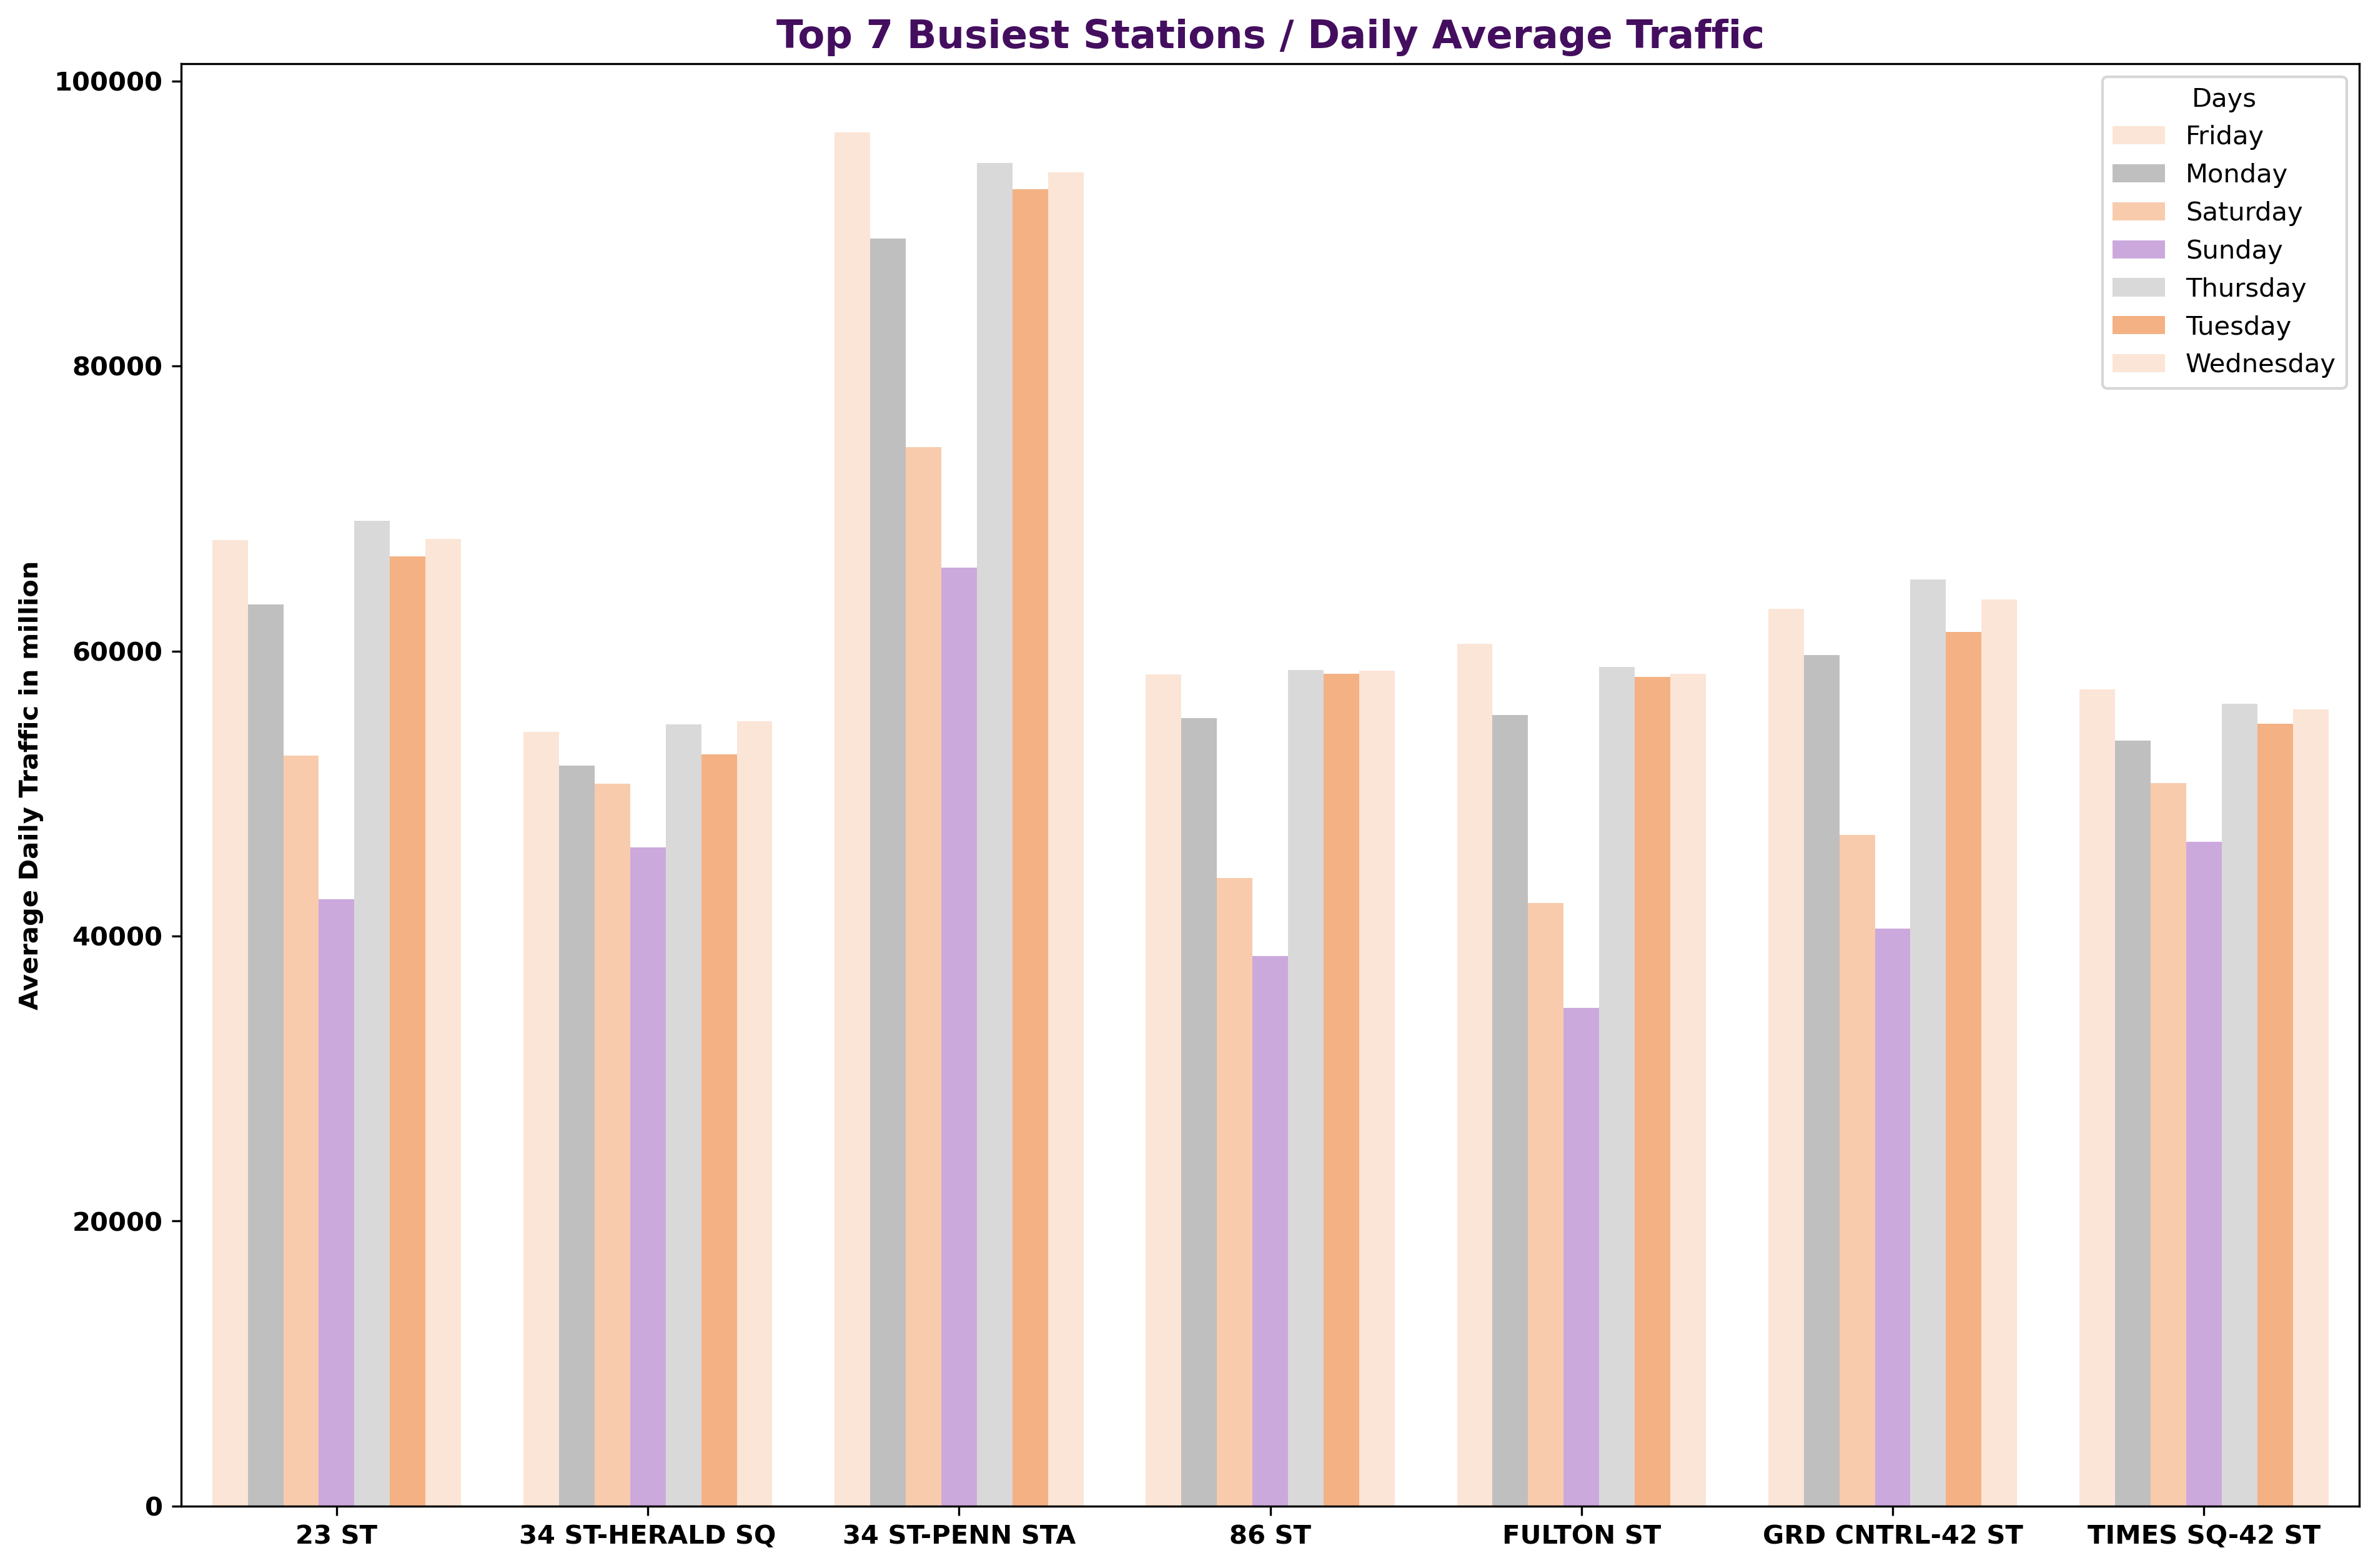

In [336]:

def million_formatter(x,pos):
    return"%.1f M" % (x/1E6)
plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
color=['#FBE5D6', '#BFBFBF', '#F8CBAD','#CCA9DD', '#D9D9D9', '#F4B183']
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="NAMEOFDAY",data=mta_top7_daily, palette=color, saturation=1)
plt.title("Top 7 Busiest Stations / Daily Average Traffic", weight="bold", c="#440E5F", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
ax.set_facecolor("white")
plt.ylabel("Average Daily Traffic in million",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.ylim(0)
plt.legend(title="Days")
plt.show()



In [337]:
# Trafiğe göre en yoğun 7 istasyonu bulma

mta_daily = mta.groupby(["DATE","STATION"]).agg(TRAFFIC=('TRAFFIC','sum')).sort_values(["DATE","TRAFFIC"],ascending=False). reset_index()
mta_daily.head()


,DATE,STATION,TRAFFIC
0,05/27/2022,34 ST-PENN STA,"96,775.0"
1,05/27/2022,23 ST,"66,665.0"
2,05/27/2022,TIMES SQ-42 ST,"63,891.0"
3,05/27/2022,GRD CNTRL-42 ST,"62,255.0"
4,05/27/2022,FULTON ST,"61,110.0"


In [338]:
mta_daily["RANK"]=mta_daily.groupby(["DATE"])["TRAFFIC"].rank(method='first', ascending=False)
mta_daily.RANK.info()

<class 'pandas.core.series.Series'>
RangeIndex: 34397 entries, 0 to 34396
Series name: RANK
Non-Null Count  Dtype  
--------------  -----  
34397 non-null  float64
dtypes: float64(1)
memory usage: 268.9 KB


In [339]:
#gün bazında top5 istasyon belirledik
mta_daily_top5=mta_daily.loc[mta_daily.RANK <= 5.0].reset_index().sort_values(['DATE','RANK'])
mta_daily_top5['MONTH']=pd.to_datetime(mta_daily_top5['DATE']).dt.month
mta_daily_top5=mta_daily_top5.reset_index()
mta_daily_top5.loc[(mta_daily_top5.MONTH == 5)].head(50)

,level_0,index,DATE,STATION,TRAFFIC,RANK,MONTH
320,130,9833,05/01/2022,34 ST-PENN STA,"69,808.0",1.0,5
321,131,9834,05/01/2022,34 ST-HERALD SQ,"49,333.0",2.0,5
322,132,9835,05/01/2022,TIMES SQ-42 ST,"48,355.0",3.0,5
323,133,9836,05/01/2022,23 ST,"46,713.0",4.0,5
324,134,9837,05/01/2022,42 ST-PORT AUTH,"44,070.0",5.0,5
325,125,9455,05/02/2022,34 ST-PENN STA,"87,945.0",1.0,5
326,126,9456,05/02/2022,23 ST,"64,040.0",2.0,5
327,127,9457,05/02/2022,GRD CNTRL-42 ST,"61,740.0",3.0,5
328,128,9458,05/02/2022,FULTON ST,"56,768.0",4.0,5
329,129,9459,05/02/2022,TIMES SQ-42 ST,"55,073.0",5.0,5


In [340]:
#sadece mayıs ayı için gün bazında en yoğun istasyonları bulduk ve rank atadık
may_total_traffic=mta_daily_top5.groupby(["DATE"]).agg(TRAFFIC_TOTAL=('TRAFFIC','sum')).reset_index()
mta_daily_top5=pd.merge(mta_daily_top5,may_total_traffic, on=['DATE'], how='left')
mta_daily_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 454
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   level_0        455 non-null    int64  
 1   index          455 non-null    int64  
 2   DATE           455 non-null    object 
 3   STATION        455 non-null    object 
 4   TRAFFIC        455 non-null    float64
 5   RANK           455 non-null    float64
 6   MONTH          455 non-null    int64  
 7   TRAFFIC_TOTAL  455 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 32.0+ KB


In [341]:
#ilgili istasyonun top5 istasyon içindeki oranını bularak 
#istastonda görevlendirilecek kişi sayısını belirledik
mta_daily_top5['RATE']=round((mta_daily_top5['TRAFFIC']/mta_daily_top5['TRAFFIC_TOTAL'])*100)

In [355]:
mta_daily_top5.head(50)

,level_0,index,DATE,STATION,TRAFFIC,RANK,MONTH,TRAFFIC_TOTAL,RATE
0,450,34019,02/26/2022,34 ST-PENN STA,"55,746.0",1.0,2,"226,319.0",25.0
1,451,34020,02/26/2022,34 ST-HERALD SQ,"45,373.0",2.0,2,"226,319.0",20.0
2,452,34021,02/26/2022,23 ST,"42,765.0",3.0,2,"226,319.0",19.0
3,453,34022,02/26/2022,TIMES SQ-42 ST,"41,956.0",4.0,2,"226,319.0",19.0
4,454,34023,02/26/2022,86 ST,"40,479.0",5.0,2,"226,319.0",18.0
5,445,33641,02/27/2022,34 ST-PENN STA,"56,965.0",1.0,2,"221,374.0",26.0
6,446,33642,02/27/2022,34 ST-HERALD SQ,"44,312.0",2.0,2,"221,374.0",20.0
7,447,33643,02/27/2022,TIMES SQ-42 ST,"41,212.0",3.0,2,"221,374.0",19.0
8,448,33644,02/27/2022,23 ST,"39,447.0",4.0,2,"221,374.0",18.0
9,449,33645,02/27/2022,125 ST,"39,438.0",5.0,2,"221,374.0",18.0
